In [13]:
%reset -f

In [14]:
import roboticstoolbox as rtb
robot = rtb.models.Panda()
print(robot)

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌─────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│link │     link     │ joint │   parent    │              ETS: parent to link               │
├─────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│   0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│   1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│   2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│   3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│   4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│   5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│   6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0°) ⊕ Rz(q5

In [15]:
Te = robot.fkine(robot.qr)  # forward kinematics
print(Te)

   0.995     0         0.09983   0.484     
   0        -1         0         0         
   0.09983   0        -0.995     0.4126    
   0         0         0         1         



In [16]:
from spatialmath import SE3

Tep = SE3.Trans(0.6, -0.3, 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
sol = robot.ik_LM(Tep)         # solve IK
print(sol)

(array([ 2.09989098, -0.80318579, -2.46840499, -1.69292244, -0.62592508,
        2.26895323, -2.4568991 ]), 1, 29, 2, 7.779630081387613e-08)


In [17]:
q_pickup = sol[0]
print(robot.fkine(q_pickup))    # FK shows that desired end-effector pose was achieved

  -1         0.0001712 -0.0002491  0.5998    
   0.0001713  1        -2.875e-05 -0.2999    
   0.0002491 -2.879e-05 -1         0.0999    
   0         0         0         1         



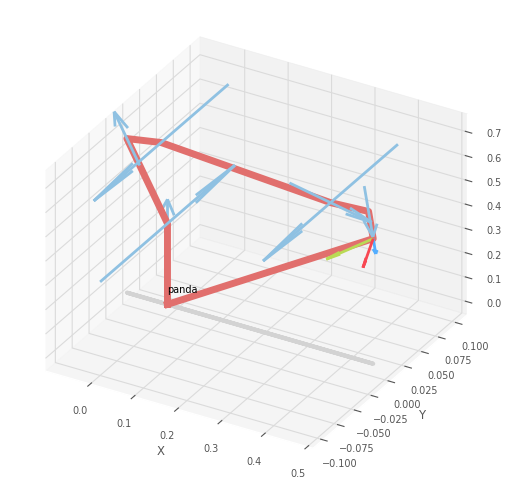

PyPlot3D backend, t = 2.499999999999999, scene:
  robot: Text(0.0, 0.0, 'panda')

<Figure size 640x480 with 0 Axes>

In [18]:
qt = rtb.jtraj(robot.qr, q_pickup, 50)
robot.plot(qt.q, backend='pyplot', movie='panda1.gif')

In [19]:
robot.plot(qt.q)

Swift backend, t = 2.499999999999999, scene:
  panda